# Logistic Regression With Polynomial Features

In [177]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
import tensorflow as tf
import plotly.graph_objects as go
from sklearn.metrics import  f1_score

In [135]:
data_points = 1000
# Generate synthetic data
np.random.seed(0)
x1 = np.random.randn(data_points).reshape(data_points, 1)
x2 = np.random.randn(data_points).reshape(data_points, 1)
y = ((x1**2 + x2**2) < 1.5).astype(int) 
y = y.reshape(-1)
x1 += 1     # Moving the center of data points away from origin (Optional)
x2 += 1     # Moving the center of data points away from origin (Optional)

# Prepare the data
X = np.hstack([x1, x2])

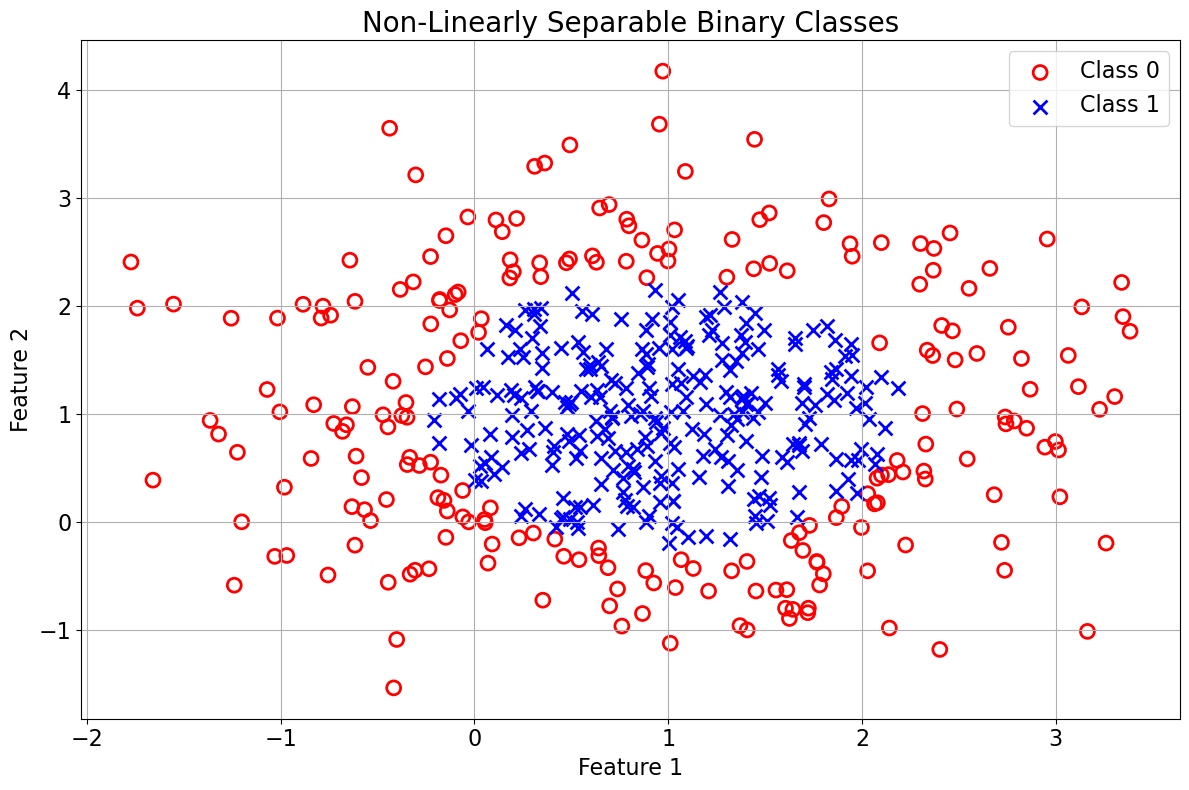

In [136]:
# Displaying the data

np.random.seed(11)
# Prepare the data
indices = np.random.choice(X.shape[0], size=500, replace=False)

# Select samples from array1 and array2 using the random indices
X_sampled = X[indices]
y_sampled = y[indices]


# Plot the data points
plt.figure(figsize=(12, 8))
plt.scatter(X_sampled[y_sampled == 0, 0], X_sampled[y_sampled == 0, 1], facecolors='none',color='red', label='Class 0', s=100, linewidth=2)
plt.scatter(X_sampled[y_sampled == 1, 0], X_sampled[y_sampled == 1, 1], marker='x', color='blue', label='Class 1', s=100, linewidth=2)
plt.legend(fontsize=16)
plt.title('Non-Linearly Separable Binary Classes', fontsize=20)
plt.xlabel('Feature 1', fontsize=16)
plt.ylabel('Feature 2', fontsize=16)
plt.grid()
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.tight_layout()
plt.show()

### Creating logistic regression model without polynomial features (Fitting a Straight Line)

In [81]:
# Splitting dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [82]:
print('X_train shape (examples x features):', X_train.shape)
print('X_test shape (examples x features):', X_test.shape)
print("y_train shape (examples x target variables):", y_train.shape)
print("y_test shape (examples x target variables):", y_test.shape)

X_train shape (examples x features): (800, 2)
X_test shape (examples x features): (200, 2)
y_train shape (examples x target variables): (800,)
y_test shape (examples x target variables): (200,)


In [83]:
# To decay learning rate for smooth convergence
class ExponentialDecayCallback(tf.keras.callbacks.Callback):
    def __init__(self, decay_factor=0.95):
        super(ExponentialDecayCallback, self).__init__()
        self.decay_factor = decay_factor

    def on_epoch_end(self, epoch, logs=None):
        # Update learning rate
        lr = self.model.optimizer.learning_rate.numpy()
        lr *= self.decay_factor
        self.model.optimizer.learning_rate.assign(lr)

In [90]:
# Creating Logistic Regression Model
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(1)
])

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), loss=tf.keras.losses.BinaryCrossentropy(from_logits=True), metrics=['accuracy'])
# Train the model
monitor=ExponentialDecayCallback(decay_factor=0.95)
history = model.fit(X_train, y_train, epochs=100, batch_size=128, callbacks=[monitor], verbose=2)

Epoch 1/100
7/7 - 2s - 223ms/step - accuracy: 0.4250 - loss: 0.9950
Epoch 2/100
7/7 - 0s - 5ms/step - accuracy: 0.4212 - loss: 0.9264
Epoch 3/100
7/7 - 0s - 7ms/step - accuracy: 0.4200 - loss: 0.8681
Epoch 4/100
7/7 - 0s - 7ms/step - accuracy: 0.4200 - loss: 0.8219
Epoch 5/100
7/7 - 0s - 7ms/step - accuracy: 0.4187 - loss: 0.7847
Epoch 6/100
7/7 - 0s - 7ms/step - accuracy: 0.4150 - loss: 0.7559
Epoch 7/100
7/7 - 0s - 7ms/step - accuracy: 0.4150 - loss: 0.7345
Epoch 8/100
7/7 - 0s - 6ms/step - accuracy: 0.4150 - loss: 0.7208
Epoch 9/100
7/7 - 0s - 7ms/step - accuracy: 0.4112 - loss: 0.7107
Epoch 10/100
7/7 - 0s - 7ms/step - accuracy: 0.4087 - loss: 0.7041
Epoch 11/100
7/7 - 0s - 16ms/step - accuracy: 0.4050 - loss: 0.6992
Epoch 12/100
7/7 - 0s - 36ms/step - accuracy: 0.4013 - loss: 0.6967
Epoch 13/100
7/7 - 0s - 41ms/step - accuracy: 0.3988 - loss: 0.6945
Epoch 14/100
7/7 - 0s - 11ms/step - accuracy: 0.3988 - loss: 0.6929
Epoch 15/100
7/7 - 0s - 11ms/step - accuracy: 0.3963 - loss: 0.69

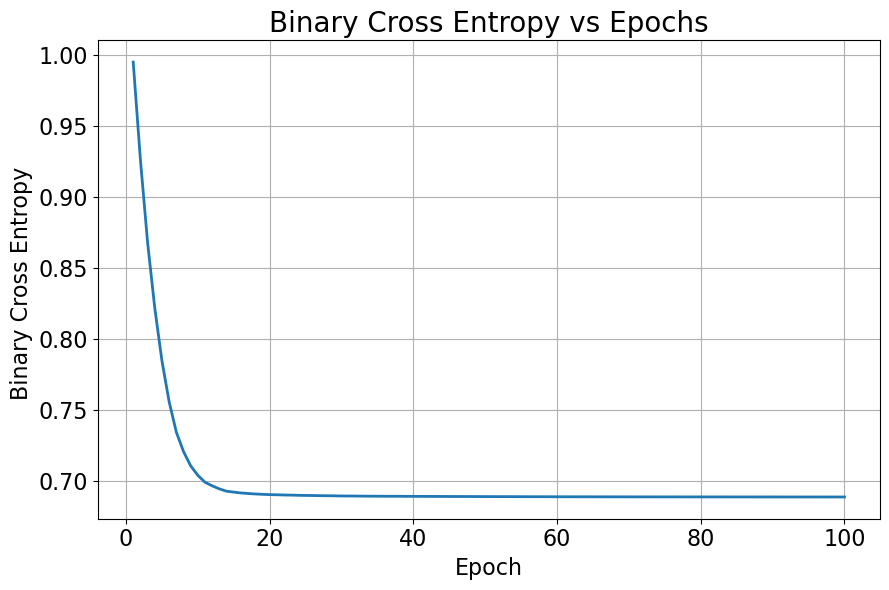

In [131]:
iterations = np.arange(1, len(history.history['loss'])+1)
plt.figure(figsize=(9, 6))
plt.plot(iterations, history.history['loss'], linewidth=2)
plt.title('Binary Cross Entropy vs Epochs', fontsize=20)
plt.xlabel('Epoch', fontsize=16)
plt.ylabel('Binary Cross Entropy ', fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.grid(True)
plt.tight_layout()
# plt.savefig('bce_no_poly.png', dpi=300)
plt.show()

In [95]:
logit = model.predict(X_test, verbose=0)
y_pred = np.array(tf.nn.sigmoid(logit))
y_pred_classes = np.where(y_pred > 0.5, 1, 0)
test_accuracy = np.mean(y_pred_classes == y_test.reshape(y_test.shape[0], 1)) * 100
test_accuracy = round(test_accuracy, 2)
print(f"Accuracy: {test_accuracy}%")

Accuracy: 56.0%


In [96]:
fig = go.Figure(go.Indicator(
    mode="gauge+number",
    value=test_accuracy,
    title={'text': "Model Accuracy"},
    number={'suffix': "%"},
    gauge={
        'axis': {'range': [0, 100]},
        'bar': {'color': "#FF5B00"},
        'steps': [
            {'range': [0, 50], 'color': "lightcoral"},
            {'range': [50, 70], 'color': "#FFA500"},
            {'range': [70, 90], 'color': "yellow"},
            {'range': [90, 100], 'color': "lightgreen"}
        ],
    }
))
fig.update_layout(
    width=600,
    height=400,
)
# fig.write_image("accuracy_no_poly.png", scale=2)
fig.show()

In [97]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)
print('Confusion Matrix:\n', cm, '\n')
print('True positive (Actually positive, classified as positive):', cm[0][0])
print('False positive (Actually negative, classified as positive):', cm[0][1])
print('False negative (Actually positive, classified as negative):', cm[1][0])
print('True negative (Actually negative, classified as negative):', cm[1][1])

Confusion Matrix:
 [[  1  88]
 [  0 111]] 

True positive (Actually positive, classified as positive): 1
False positive (Actually negative, classified as positive): 88
False negative (Actually positive, classified as negative): 0
True negative (Actually negative, classified as negative): 111


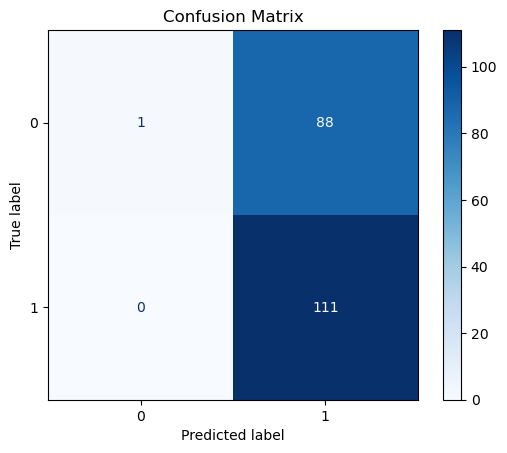

In [114]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
# plt.savefig('cm_no_poly.png', dpi=300)
plt.show()

In [99]:
# Generating classification report from scikit-learn
cr = classification_report(y_test, y_pred_classes)
print('Classification Report\n\n', cr)

Classification Report

               precision    recall  f1-score   support

           0       1.00      0.01      0.02        89
           1       0.56      1.00      0.72       111

    accuracy                           0.56       200
   macro avg       0.78      0.51      0.37       200
weighted avg       0.75      0.56      0.41       200



### Creating logistic regression model with polynomial features (Fitting a Non-Linear Boundary)

In [100]:
# Creating Polynomial features of order 2
x1_sq = x1 ** 2
x2_sq = x2 ** 2
x1_x2 = x1 * x2
X_poly = np.hstack([x1, x2, x1_x2, x1_sq, x2_sq])

In [101]:
X_train_poly, X_test_poly, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42, stratify=y)
print('X_train_poly shape (examples x features):', X_train_poly.shape)
print('X_test_poly shape (examples x features):', X_test_poly.shape)

X_train_poly shape (examples x features): (800, 5)
X_test_poly shape (examples x features): (200, 5)


In [116]:
model2 = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(X_train_poly.shape[1],)),
    tf.keras.layers.Dense(1)
])

model2.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.5), loss=tf.keras.losses.BinaryCrossentropy(from_logits=True), metrics=['accuracy'])
monitor=ExponentialDecayCallback(decay_factor=0.99)
# Train the model
history2 = model2.fit(X_train_poly, y_train, epochs=100, batch_size=128, callbacks=[monitor], verbose=2)

Epoch 1/100
7/7 - 1s - 197ms/step - accuracy: 0.4650 - loss: 1.4645
Epoch 2/100
7/7 - 0s - 29ms/step - accuracy: 0.7250 - loss: 0.6950
Epoch 3/100
7/7 - 0s - 14ms/step - accuracy: 0.8450 - loss: 0.3621
Epoch 4/100
7/7 - 0s - 8ms/step - accuracy: 0.8900 - loss: 0.2954
Epoch 5/100
7/7 - 0s - 5ms/step - accuracy: 0.9075 - loss: 0.2581
Epoch 6/100
7/7 - 0s - 8ms/step - accuracy: 0.9187 - loss: 0.2220
Epoch 7/100
7/7 - 0s - 33ms/step - accuracy: 0.9237 - loss: 0.2037
Epoch 8/100
7/7 - 0s - 18ms/step - accuracy: 0.9237 - loss: 0.1930
Epoch 9/100
7/7 - 0s - 10ms/step - accuracy: 0.9350 - loss: 0.1818
Epoch 10/100
7/7 - 0s - 9ms/step - accuracy: 0.9400 - loss: 0.1706
Epoch 11/100
7/7 - 0s - 10ms/step - accuracy: 0.9525 - loss: 0.1636
Epoch 12/100
7/7 - 0s - 8ms/step - accuracy: 0.9575 - loss: 0.1574
Epoch 13/100
7/7 - 0s - 23ms/step - accuracy: 0.9463 - loss: 0.1554
Epoch 14/100
7/7 - 0s - 45ms/step - accuracy: 0.9675 - loss: 0.1474
Epoch 15/100
7/7 - 0s - 16ms/step - accuracy: 0.9350 - loss: 

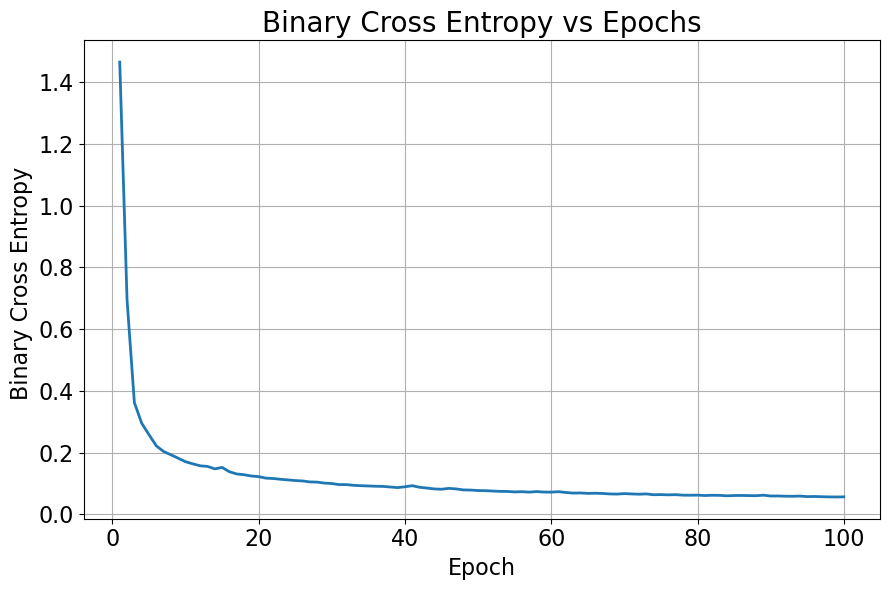

In [129]:
iterations = np.arange(1, len(history2.history['loss'])+1)
plt.figure(figsize=(9, 6))
plt.plot(iterations, history2.history['loss'], linewidth=2)
plt.title('Binary Cross Entropy vs Epochs', fontsize=20)
plt.xlabel('Epoch', fontsize=16)
plt.ylabel('Binary Cross Entropy ', fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.grid(True)
plt.tight_layout()
# plt.savefig('bce_poly.png', dpi=300)
plt.show()

In [118]:
logit_poly = model2.predict(X_test_poly, verbose=0)
y_pred_poly = np.array(tf.nn.sigmoid(logit_poly))
y_pred_poly_classes = np.where(y_pred_poly > 0.5, 1, 0)
test_accuracy2 = np.mean(y_pred_poly_classes == y_test.reshape(y_test.shape[0], 1)) * 100
test_accuracy2 = round(test_accuracy2, 2)
print(f"Accuracy: {test_accuracy2}%")

Accuracy: 100.0%


In [119]:
fig = go.Figure(go.Indicator(
    mode="gauge+number",
    value=test_accuracy2,
    title={'text': "Model Accuracy"},
    number={'suffix': "%"},
    gauge={
        'axis': {'range': [0, 100]},
        'bar': {'color': "#009900"},
        'steps': [
            {'range': [0, 50], 'color': "lightcoral"},
            {'range': [50, 70], 'color': "#FFA500"},
            {'range': [70, 90], 'color': "yellow"},
            {'range': [90, 100], 'color': "lightgreen"}
        ],
    }
))
fig.update_layout(
    width=600,
    height=400,
)
# fig.write_image("accuracy_poly.png", scale=2)
fig.show()

In [120]:
# Confusion matrix
cm_poly = confusion_matrix(y_test, y_pred_poly_classes)
print('Confusion Matrix:\n', cm_poly, '\n')
print('True positive (Actually positive, classified as positive):', cm_poly[0][0])
print('False positive (Actually negative, classified as positive):', cm_poly[0][1])
print('False negative (Actually positive, classified as negative):', cm_poly[1][0])
print('True negative (Actually negative, classified as negative):', cm_poly[1][1])

Confusion Matrix:
 [[ 89   0]
 [  0 111]] 

True positive (Actually positive, classified as positive): 89
False positive (Actually negative, classified as positive): 0
False negative (Actually positive, classified as negative): 0
True negative (Actually negative, classified as negative): 111


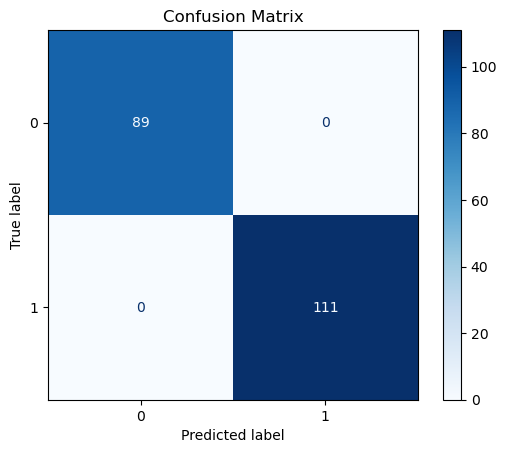

In [121]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm_poly)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
# plt.savefig('cm_poly.png', dpi=300)
plt.show()

In [122]:
# Generating classification report from scikit-learn
cr = classification_report(y_test, y_pred_poly_classes)
print('Classification Report\n\n', cr)

Classification Report

               precision    recall  f1-score   support

           0       1.00      1.00      1.00        89
           1       1.00      1.00      1.00       111

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



### Visualizing the Elliptic Decision Boundary

In [124]:
w1 = model2.get_weights()[0][0][0]
w2 = model2.get_weights()[0][1][0]
w3 = model2.get_weights()[0][2][0]
w4 = model2.get_weights()[0][3][0]
w5 = model2.get_weights()[0][4][0]
b = model2.get_weights()[1][0]

### Equation of Boundary:

$ w_1x + w_2y + w_3xy + w_4x^2 + w_5y^2 + b = 0 $

Here $x$ is equivalent to feature $x_1$ and $y$ is equivalent to feature $x_2$

Group terms involving $ y $:

$ w_5y^2 + (w_2 + w_3x)y + (w_1x + w_4x^2 + b) = 0 $

This is now in the standard quadratic form $ Ay^2 + By + C = 0 $, where:

- $ A = w_5 $
- $ B = w_2 + w_3x $
- $ C = w_1x + w_4x^2 + b $

### Solving for $ y $

Use the quadratic formula to solve for $ y $:

$ y = \frac{-B \pm \sqrt{B^2 - 4AC}}{2A} $

Substitute $ A $, $ B $, and $ C $ into the formula:

1. **Calculate the discriminant**:
   $ \Delta = B^2 - 4AC $

2. **Compute the two possible values for $ y $**:

   $ y_{1,2} = \frac{-(w_2 + w_3x) \pm \sqrt{(w_2 + w_3x)^2 - 4w_5(w_1x + w_4x^2 + b)}}{2w_5} $

### Finding the range of input $x$ for which the discriminant is non-zero

Discriminant is given as:

$ (w_2 + w_3x)^2 - 4w_5(w_1x + w_4x^2 + b) = 0 $

**Rewriting the Equation**:

$ (w_2 + w_3x)^2 - 4w_5(w_1x + w_4x^2 + b) = 0 $

Expand and simplify to get it in the form $ Ax^2 + Bx + C = 0 $:

$ (w_2 + w_3x)^2 = 4w_5(w_1x + w_4x^2 + b) $

Expanding $ (w_2 + w_3x)^2 $:

$ w_2^2 + 2w_2w_3x + w_3^2x^2 = 4w_5w_1x + 4w_5w_4x^2 + 4w_5b $

**Combine like terms**:

$ w_3^2x^2 + 2w_2w_3x + w_2^2 = 4w_5w_4x^2 + 4w_5w_1x + 4w_5b $

Move all terms to one side to form a quadratic equation in $ x $:

$ w_3^2x^2 - 4w_5w_4x^2 + 2w_2w_3x - 4w_5w_1x + w_2^2 - 4w_5b = 0 $

**Identify the coefficients $ A $, $ B $, and $ C $**:

$ (w_3^2 - 4w_5w_4)x^2 + (2w_2w_3 - 4w_5w_1)x + (w_2^2 - 4w_5b) = 0 $

So the coefficients are:

$ A = w_3^2 - 4w_5w_4 $

$ B = 2w_2w_3 - 4w_5w_1 $

$ C = w_2^2 - 4w_5b $

Using these coefficients, you can solve the quadratic equation for $ x $ using the quadratic formula:

$ x = \frac{-B \pm \sqrt{B^2 - 4AC}}{2A} $

In [125]:
# Calculating valid range of input values to the equation of ellipse
A = w3**2 - 4*w5*w4
B = 2*w3*w2 - 4*w5*w1
C = w2**2 - 4*w5*b

# Use numpy.roots to find the roots
coefficients = [A, B, C]
roots = np.roots(coefficients)

print("Roots of the equation:", roots)

Roots of the equation: [ 2.21928124 -0.23960324]


In [138]:
x = np.linspace(roots[1]+10e-10, roots[0]-10e-10, 500)
disc = (w3 * x + w2) ** 2 - 4 * w5 * (w4 * x ** 2 + w1 * x + b)
sqrt_disc = np.sqrt(disc)
y1 = ( -(w3 * x + w2) + sqrt_disc) / (2 * w5)  # One half of the ellipse
y2 = ( -(w3 * x + w2) - sqrt_disc) / (2 * w5)  # Other half of the ellipse

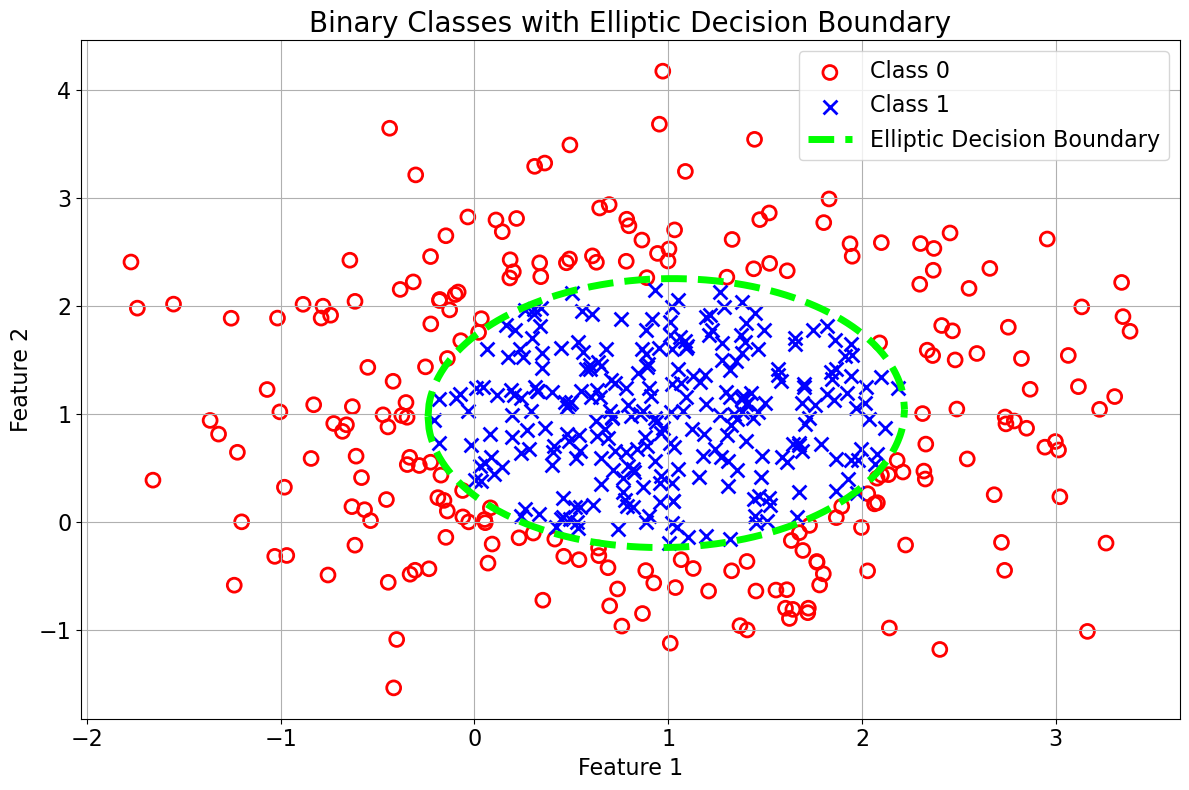

In [139]:
# Plotting the data points with decision boundary
plt.figure(figsize=(12, 8))
plt.scatter(X_sampled[y_sampled == 0, 0], X_sampled[y_sampled == 0, 1], facecolors='none',color='red', label='Class 0', s=100, linewidth=2)
plt.scatter(X_sampled[y_sampled == 1, 0], X_sampled[y_sampled == 1, 1], marker='x', color='blue', label='Class 1', s=100, linewidth=2)
plt.plot(x, y1, linewidth=5,color='lime', linestyle='--', label='Elliptic Decision Boundary')
plt.plot(x, y2, linewidth=5,color='lime', linestyle='--')
plt.legend(fontsize=16)
plt.title('Binary Classes with Elliptic Decision Boundary', fontsize=20)
plt.xlabel('Feature 1', fontsize=16)
plt.ylabel('Feature 2', fontsize=16)
plt.grid()
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.tight_layout()
# plt.savefig('poly_cover.png', dpi=300)
plt.show()

### Choosing the appropriate degree of polynomial features

In [144]:
X_main, X_test, y_main, y_test = train_test_split(X, y, test_size=0.2, random_state=11, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_main, y_main, test_size=0.125, random_state=42, stratify=y_main)
print('X_train shape (examples x features):', X_train.shape)
print('X_test shape (examples x features):', X_test.shape)
print('X_val shape (examples x features):', X_val.shape)
print("y_train shape (examples x target variables):", y_train.shape)
print("y_test shape (examples x target variables):", y_test.shape)
print("y_val shape (examples x target variables):", y_val.shape)

X_train shape (examples x features): (700, 2)
X_test shape (examples x features): (200, 2)
X_val shape (examples x features): (100, 2)
y_train shape (examples x target variables): (700,)
y_test shape (examples x target variables): (200,)
y_val shape (examples x target variables): (100,)


In [179]:
monitor=ExponentialDecayCallback(decay_factor=0.99)
results = []
max_degree = 5
for degree in range(1, max_degree + 1):
    # Generate polynomial features
    poly = PolynomialFeatures(degree, include_bias=False)
    X_train_poly = poly.fit_transform(X_train)
    X_val_poly = poly.fit_transform(X_val)

    model_dev = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(X_train_poly.shape[1],)),
    tf.keras.layers.Dense(1)
])
    print(f'Training with degree {degree} polynomial features!\n')
    model_dev.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1.), loss=tf.keras.losses.BinaryCrossentropy(from_logits=True))
    # Train the model
    model_dev.fit(X_train_poly, y_train, epochs=100, batch_size=128, callbacks=[monitor], verbose=0)
    logit_poly = model_dev.predict(X_val_poly, verbose=0)
    y_pred_poly = np.array(tf.nn.sigmoid(logit_poly))
    y_pred_poly_classes = np.where(y_pred_poly > 0.5, 1, 0)
    f1_val = f1_score(y_val, y_pred_poly_classes)
    val_loss = model_dev.evaluate(X_val_poly, y_val, verbose=0)
    print(f'Validation Loss: {val_loss}\n')
    print(f'F1 Score: {f1_val}\n')
    results.append(
        {
            'model': model_dev,
            'poly_degree': degree,
            'val_loss': val_loss,
            'f1_score': f1_val
        }
    )

Training with degree 1 polynomial features!

Validation Loss: 0.7116920948028564

F1 Score: 0.7096774193548387

Training with degree 2 polynomial features!

Validation Loss: 0.03916953504085541

F1 Score: 1.0

Training with degree 3 polynomial features!

Validation Loss: 0.03408018872141838

F1 Score: 0.9909909909909909

Training with degree 4 polynomial features!

Validation Loss: 0.02090577781200409

F1 Score: 0.9909909909909909

Training with degree 5 polynomial features!

Validation Loss: 0.006763326935470104

F1 Score: 1.0



### Comparing Validation Loss

In [213]:
results = sorted(results, key=lambda x: x['val_loss'], reverse=True)
degree = [elem['poly_degree'] for elem in results]
loss = [elem['val_loss'] for elem in results]

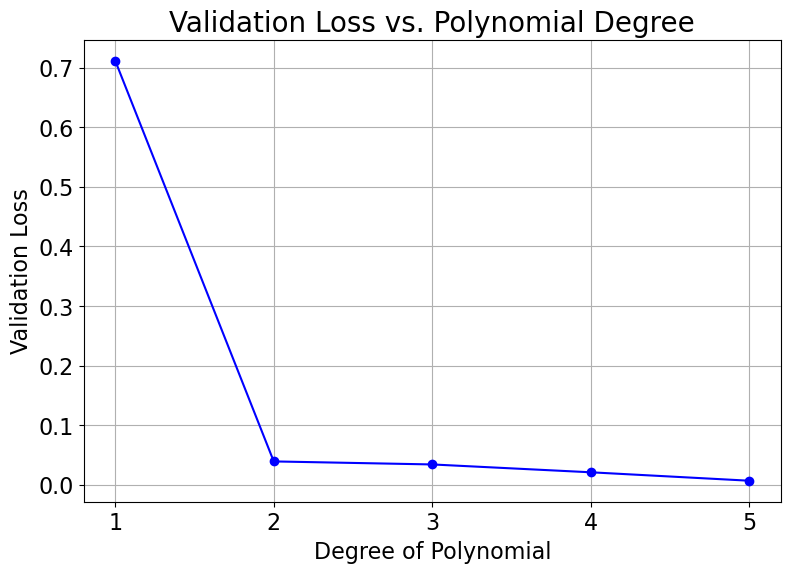

In [214]:
idx = range(0, len(loss))
plt.figure(figsize=(9, 6))

# Plotting the data with markers
plt.plot(idx, loss, marker='o', linestyle='-', color='b')

# Adding title and labels with large font sizes
plt.title('Validation Loss vs. Polynomial Degree', fontsize=20)
plt.xlabel('Degree of Polynomial', fontsize=16)
plt.ylabel('Validation Loss', fontsize=16)

# Setting integer ticks on x and y axes
plt.xticks(idx, degree, fontsize=16)
plt.yticks(fontsize=16)

# Adding grid for better readability
plt.grid(True)
# plt.savefig('val_loss.png', dpi=300)
# Display the plot
plt.show()

### Comparing Validation F1 Score

In [199]:
results = sorted(results, key=lambda x: (-x['f1_score'], x['poly_degree']))
degree = [elem['poly_degree'] for elem in results]
f1_score = [elem['f1_score'] for elem in results]

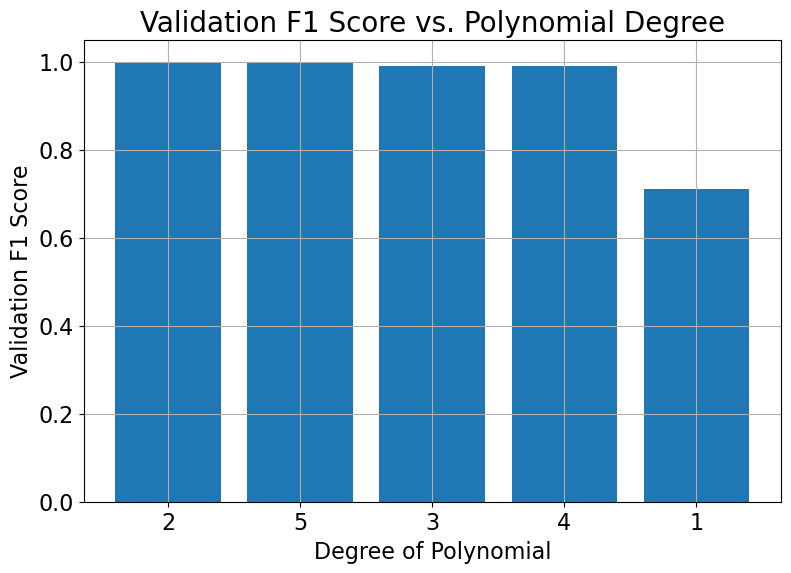

In [212]:
idx = range(0, len(f1))
plt.figure(figsize=(9, 6))

# Plotting the data with markers
plt.bar(idx, f1)

# Adding title and labels with large font sizes
plt.title('Validation F1 Score vs. Polynomial Degree', fontsize=20)
plt.xlabel('Degree of Polynomial', fontsize=16)
plt.ylabel('Validation F1 Score', fontsize=16)

# Setting integer ticks on x and y axes
plt.xticks(idx, degree, fontsize=16)
plt.yticks(fontsize=16)

# Adding grid for better readability
plt.grid(True)
# plt.savefig('f1_scores.png', dpi=300)
# Display the plot
plt.show()

#### Based on the comparison, degree 2 is most optimum both in terms of performance and accuracy. Let's test the accuracy on test set.

In [206]:
results

[{'model': <Sequential name=sequential_65, built=True>,
  'poly_degree': 2,
  'val_loss': 0.03916953504085541,
  'f1_score': 1.0},
 {'model': <Sequential name=sequential_68, built=True>,
  'poly_degree': 5,
  'val_loss': 0.006763326935470104,
  'f1_score': 1.0},
 {'model': <Sequential name=sequential_66, built=True>,
  'poly_degree': 3,
  'val_loss': 0.03408018872141838,
  'f1_score': 0.9909909909909909},
 {'model': <Sequential name=sequential_67, built=True>,
  'poly_degree': 4,
  'val_loss': 0.02090577781200409,
  'f1_score': 0.9909909909909909},
 {'model': <Sequential name=sequential_64, built=True>,
  'poly_degree': 1,
  'val_loss': 0.7116920948028564,
  'f1_score': 0.7096774193548387}]

In [207]:
selected_model = results[0]['model']
poly = PolynomialFeatures(2, include_bias=False)
X_test_poly = poly.fit_transform(X_test)

In [209]:
logit_poly = selected_model.predict(X_test_poly, verbose=0)
y_pred_poly = np.array(tf.nn.sigmoid(logit_poly))
y_pred_poly_classes = np.where(y_pred_poly > 0.5, 1, 0)
test_accuracy = np.mean(y_pred_poly_classes == y_test.reshape(y_test.shape[0], 1)) * 100
test_accuracy = round(test_accuracy, 2)
print(f"Test Set Accuracy: {test_accuracy}%")

Test Set Accuracy: 100.0%
